# Exploratory Data Analysis of English quiz results

The ultimate purpose of this project is to identify different learner groups by analysing language learning data (e.g. question responses and performance in assessments). But before we can tackle this problem, here are some basic exploratory data analysis tasks to get you familiar with the main Python Data Science and visualisation libraries.

To get some context, details of the dataset we are working with can be found on its [OSF page](https://osf.io/pyb8s/wiki/home/). I've included a sample of this data in 'data/data_sample.csv' so that those of you who don't have so much memory on our laptop can still play with the data. 

Some analyses have already been conducted and reported in [Hartshorne, Tenenbaum, & Pinker. A Critical Period for Second Language Acquisition: Evidence from 2/3 Million English Speakers](https://www.sciencedirect.com/science/article/pii/S0010027718300994). This was a high profile study focusing on the time criticality of second language acquisition. You can find a summary of the study together with links to media coverage [here](https://blog.gameswithwords.org/a-critical-period-for-second-language-acquisition-evidence-from-2-3-million-english-speakers-12fca68ebc23). 

Eventually I hope we will use the data to prototype how to identify different learner groups (e.g. native/non-native, different first languages) and the similarities and differences between them.



In [8]:
## Essential libraries for manipulating data
import numpy as np
import pandas as pd


## Some plotting libraries
### matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
### seaborn - can be used to make prettier visualisations
import seaborn as sns 
sns.set_palette('Set2')
### plotly - can be used to create interactive visualisations
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools

init_notebook_mode(connected=True)

## Some additional libraries
# Do not print out warnings
import warnings
warnings.filterwarnings('ignore')
# Library for os functions, e.g. listing directory iems
import os



**1. Load the Dataset csv file (data/data_sample.csv) and count the attributes describing the data**

In [9]:
datapath = "data/"
print('#Files in {}: {}'.format(datapath, len(os.listdir(datapath))))
print(os.listdir(datapath)) 

data = pd.read_csv(datapath+'data_sample.csv', encoding = "ISO-8859-1")

data.head()
len(data.columns)
data.shape[1]

#Files in data/: 2
['data_sample.csv', 'Student_Performance.csv']


128

**2. Can you display the list of attributes?**

In [10]:

print('All attributes: {}'.format(data.columns.tolist()))


All attributes: ['Unnamed: 0', 'id', 'date', 'time', 'gender', 'age', 'natlangs', 'primelangs', 'dyslexia', 'psychiatric', 'education', 'tests', 'Eng_start', 'Eng_country_yrs', 'house_Eng', 'dictionary', 'already_participated', 'countries', 'currcountry', 'US_region', 'UK_region', 'Can_region', 'Ebonics', 'Ir_region', 'UK_constituency', 'nat_Eng', 'prime_Eng', 'speaker_cat', 'type', 'Lived_Eng_per', 'Eng_little', 'q1', 'q2', 'q3', 'q5', 'q6', 'q7', 'q9_1', 'q9_4', 'q10_2', 'q10_4', 'q11_3', 'q11_4', 'q12_1', 'q12_2', 'q12_4', 'q13_3', 'q13_4', 'q14_3', 'q14_4', 'q15_1', 'q15_2', 'q15_3', 'q16_3', 'q16_4', 'q17_1', 'q17_3', 'q17_4', 'q18_2', 'q18_3', 'q18_4', 'q19_1', 'q19_2', 'q19_3', 'q19_4', 'q20_1', 'q20_2', 'q20_3', 'q20_4', 'q21_1', 'q21_2', 'q21_3', 'q21_4', 'q22_1', 'q22_2', 'q22_3', 'q22_4', 'q23_3', 'q23_4', 'q24_1', 'q24_2', 'q24_3', 'q24_4', 'q25_1', 'q25_2', 'q25_3', 'q25_4', 'q26_1', 'q26_2', 'q26_3', 'q26_4', 'q27_1', 'q27_2', 'q27_3', 'q27_4', 'q28_1', 'q28_2', 'q29_1', 

**3. Display a random selection of 10 entries in this dataset.**

In [12]:
print(data.iloc[0:10,])
print(data.sample(10))
data = data.sample(100)

       Unnamed: 0        id        date      time  gender  age  \
12196       12339  103159.0  29/05/2014  04:05:25    male   41   
3325         3360    6736.0  28/05/2014  05:11:15  female   30   
12336       12480  103384.0  29/05/2014  04:14:03    male   26   
9060         9171   23543.0  28/05/2014  21:07:17    male   17   
4456         4506    8608.0  28/05/2014  06:48:49    male   24   
5495         5554   10272.0  28/05/2014  07:58:57  female   19   
5845         5906   10820.0  28/05/2014  08:20:47  female   33   
2758         2790    5814.0  28/05/2014  04:19:39    male   31   
3211         3244    6501.0  28/05/2014  04:58:19  female   24   
10986       11122  101356.0  29/05/2014  02:37:19  female   22   

                    natlangs        primelangs  dyslexia  psychiatric  \
12196                Finnish           Finnish         0            1   
3325                 Spanish  English, Spanish         0            0   
12336                English           English        

**4. Find the total number of rows in the dataset.**

In [13]:
numentries = data.shape[0]
print('#Entries in the dataset: {}'.format(numentries))

#Entries in the dataset: 100


**5. Find the number of native and non-native English speakers.**

In [14]:
print(data['nat_Eng'].value_counts())

0    54
1    46
Name: nat_Eng, dtype: int64


**6. How did the students perform in the test? Use summary statistics and a boxplot to describe.** 
* 'correct' field

count    100.000000
mean       0.961579
std        0.037145
min        0.810526
25%        0.947368
50%        0.973684
75%        0.989474
max        1.000000
Name: correct, dtype: float64


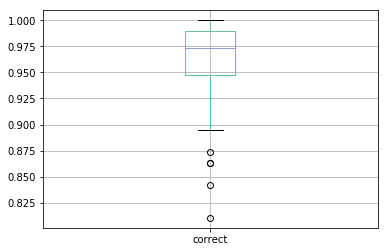

In [98]:
print(data['correct'].describe())
data.boxplot(column = ['correct']); 

#Some different syntax
#plt.boxplot(data['correct'])
#plt.boxplot(data['correct'],vert=False)

## Check documentation: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html 



In [100]:
## A different plotting library
fig = go.Figure()
fig.layout.update(title=go.layout.Title(text='Distribution of scores'))
fig.add_trace(go.Box(y=data['correct'], name='Education', boxpoints='all', jitter=1, text = data['primelangs']))
iplot(fig)

**7. Which question has the highest mean?**

In [ ]:
questioncolumns = data.columns[31:126]
#print(data[questioncolumns].describe())
questionstats = data[questioncolumns].describe()
means = pd.DataFrame(data[questioncolumns].mean())

#Method 1: Rank the means
sortedmeans = means.sort_values(ascending = False, by=0)
print(sortedmeans[0].index[0])

#Method 2: Get the index of the maximum value
maxquestion = means.idxmax()
print(maxquestion)

**8. What is the most common level of education?**

[32 29 19 14  5  1]


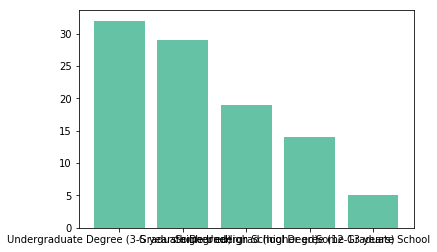

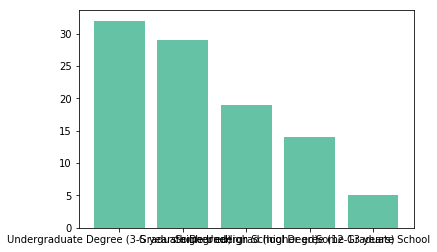

In [101]:
edcounts = data['education'].value_counts()
sortededcounts = edcounts.sort_values(ascending = False)
print(sortededcounts.values)

#More succinct
plt.bar(sortededcounts.index[0:5], sortededcounts.values[0:5])
plt.show()

#More readable
top5education = sortededcounts.index[0:5]
top5counts = sortededcounts.values[0:5]
plt.bar(top5education, top5counts)
plt.show()




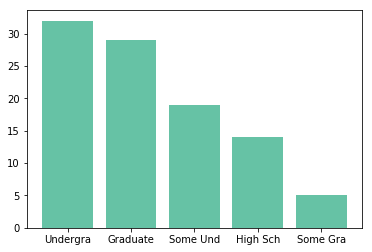

In [102]:
#Make labels shorter so the graph looks better
top5educationshort = [a[0:8] for a in top5education]
plt.bar(top5educationshort, top5counts)
plt.show()


**9. What is the median mark?**

In [104]:
print('#Median mark: {}'.format(data['correct'].median()))
print('#Median mark: {}'.format(data['correct'].describe()))




#Median mark: 0.9736842104999999
#Median mark: count    100.000000
mean       0.961579
std        0.037145
min        0.810526
25%        0.947368
50%        0.973684
75%        0.989474
max        1.000000
Name: correct, dtype: float64


**10. Find the number of students who either got all questions right or all questions wrong.**
   

In [106]:
studentsansweredcorrect = data[data['correct']==1]
print('#Students who answered all questions correctly: {}'.format(len(studentsansweredcorrect)))
print('#Students who answered all questions incorrectly: {}'.format(len(data[data['correct']==0])))
print('#Students who got less than or equal to 80%: {}'.format(len(data[data['correct']<=0.8])))


#Students who answered all questions correctly: 12
#Students who answered all questions incorrectly: 0
#Students who got less than or equal to 80%: 0


 **11. What proportion of the students answered all questions correctly?**

In [108]:
print('Proportion of students who answererd all questions correctly: {}'.format(len(data[data['correct']==1])/len(data)))
stars = data[data['correct']==1]
# Is the proportion of native English speakers higher in the full marks group than in the rest of the population

Proportion of students who answererd all questions correctly: 0.12


**12. Which question has the highest number of correct responses?**

In [110]:
questiondata = data[questioncolumns]
numcorrect = questiondata.sum(axis=0)
sortednumcorrect = numcorrect.sort_values(ascending=False)
print(sortednumcorrect)
print('Question with highest number of correct responses: {}, with {} responses'.format(sortednumcorrect.index[0], sortednumcorrect[0]))
#numgroups = len(questioncolumns)



q7       100
q27_2    100
q26_3    100
q26_1    100
q6       100
q25_3    100
q11_3    100
q24_2    100
q35_7    100
q21_4    100
q21_3    100
q21_2    100
q31_4    100
q21_1    100
q32_6    100
q19_4    100
q10_2    100
q16_3    100
q10_4    100
q13_4    100
q14_4    100
q15_1    100
q15_2    100
q16_4    100
q17_3    100
q18_2    100
q33_6    100
q27_1    100
q18_4     99
q25_1     99
        ... 
q20_1     96
q9_1      96
q9_4      96
q29_2     95
q18_3     95
q35_2     95
q34_2     95
q24_4     95
q12_4     94
q30_3     94
q30_1     94
q34_1     94
q34_6     93
q35_4     93
q33_4     93
q29_3     92
q35_1     92
q33_7     92
q23_4     90
q19_3     90
q22_3     90
q13_3     88
q35_8     87
q22_2     86
q29_1     86
q34_4     85
q11_4     81
q33_5     81
q2        81
q25_2     79
Length: 95, dtype: int64


## Visuallize different aspects of the data! 

  **12. Plot bar graph to show the distribution of students of different genders, with different primary languages, different education levels.**

In [122]:
gender_primlang = pd.crosstab(data['gender'],data['primelangs'])
#print(gender_primlang)
## This seems to be quite a lot so just group into English vs. non-English
data['prime_english'] = data['primelangs'].str.contains('English')
gender_english = pd.crosstab(data['gender'], data['prime_english']) 
print(gender_english)

gender_english_prop = pd.crosstab(data['gender'], data['prime_english']).apply(lambda r: r/r.sum(), axis=1)
print(gender_english_prop)

gender_english_means = pd.pivot_table(data, values='correct', index=['gender'],columns=['prime_english'], aggfunc='mean')

prime_english  False  True 
gender                     
female            12     41
male               4     40
other              1      1
prime_english     False     True 
gender                           
female         0.226415  0.773585
male           0.090909  0.909091
other          0.500000  0.500000


Index(['female', 'male', 'other'], dtype='object')
[54 44  2]


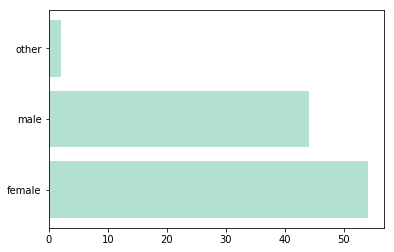

In [121]:
gendercounts = data['gender'].value_counts()
print(gendercounts.index)
print(gendercounts.values)
sortededcounts = edcounts.sort_values(ascending = False)
plt.barh(gendercounts.index, gendercounts.values, align='center', alpha=0.5)
plt.show()



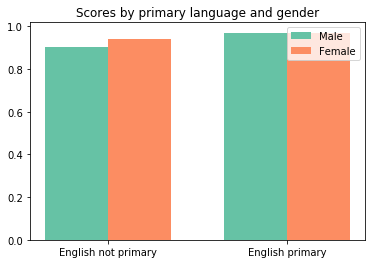

In [123]:
#Now try looking at means of each gender within English and non-English primary 
N = 2
maleMeans = gender_english_means.loc['male']
femaleMeans = gender_english_means.loc['female']

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, maleMeans, width)
p2 = ax.bar(ind + width, femaleMeans, width)

ax.set_title('Scores by primary language and gender')
#ax.set_ylim(bottom=0.9,top=1)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('English not primary', 'English primary'))

ax.legend((p1[0], p2[0]), ('Male', 'Female'))

ax.autoscale_view()

plt.show()


**13. Find and plot distribution of student performance by gender.**

In [124]:
print(data['gender'].unique())

['male' 'female' 'other']


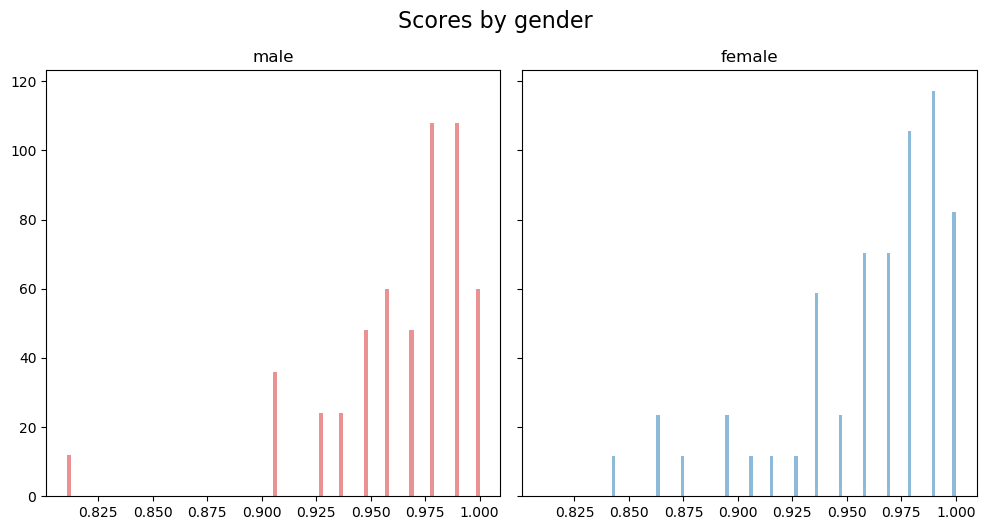

In [125]:
fig, axes = plt.subplots(1, 2, figsize=(10,5), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:blue']
genders = data['gender'].unique()

for i, (ax, g) in enumerate(zip(axes.flatten(), genders)):
    x = data[data['gender']==g]['correct']
    ax.hist(x, alpha=0.5, bins=100, density=True, stacked=True, label=str(g), color=colors[i])
    ax.set_title(g)

plt.suptitle('Scores by gender', y=1.05, size=16)
#ax.set_xlim(50, 70); ax.set_ylim(0, 1);
plt.tight_layout()
plt.show()

## Some more observations on the data! 

***Consider the students who performed best and worst, are there any features (or combination of features) that can be used to distinguish them? (Open-ended)***

